In [5]:
import simulator
import torch
import re
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list
from sklearn.cluster import AgglomerativeClustering

# Read the data:

file = 'simulation_results(3).txt'

hgt_rates, gene_presence_absence_matrices_unfiltered = simulator.read_simulation_results(file)

# Filter out completely lost genes:

gene_presence_absence_matrices = []
for i in range(0,len(gene_presence_absence_matrices_unfiltered)):
    #gene_presence_absence_matrices.append(np.array([row for row in gene_presence_absence_matrices_unfiltered[i] if not (np.all(row == 0))]))
    gene_presence_absence_matrices.append(np.array([row for row in gene_presence_absence_matrices_unfiltered[i]]))



In [30]:
from collections import Counter

def calculate_gene_frequency_spectrum(list_of_matrices):
    output = []
    
    for matrix in list_of_matrices:
        
        allele_frequencies = np.sum(matrix, axis=1)

        frequency_vector = np.zeros(matrix.shape[1] + 1, dtype=int)

        unique, counts = np.unique(allele_frequencies, return_counts=True)
        frequency_vector[unique.astype(int)] = counts
        
        output.append(frequency_vector)
        
    return output

gfs = calculate_gene_frequency_spectrum(gene_presence_absence_matrices)

hgt_rates_simulations = torch.tensor(hgt_rates)
hgt_rates_simulations = hgt_rates_simulations.view(-1, 1)

gfs_simulations = torch.tensor(gfs, dtype=torch.float32)



tensor([1.8228e-02, 3.7744e-02, 3.2756e-03, 1.8902e-02, 3.4873e-02, 7.0774e-02,
        1.7290e-02, 5.6157e-02, 6.5382e-03, 6.6087e-02, 4.9755e-02, 5.6187e-02,
        9.0296e-02, 8.5570e-02, 7.8629e-02, 4.0366e-02, 5.9596e-02, 4.2430e-02,
        2.2383e-02, 8.7581e-02, 6.8768e-02, 1.7637e-02, 5.5690e-02, 6.7119e-02,
        4.1888e-02, 6.6231e-02, 5.4653e-02, 8.3384e-02, 6.0281e-02, 1.2983e-02,
        8.7411e-02, 5.7781e-02, 6.5548e-02, 2.2870e-03, 6.4574e-02, 9.0856e-02,
        4.1463e-02, 5.1663e-02, 6.3454e-02, 9.1550e-02, 6.0761e-02, 3.3845e-02,
        3.9020e-03, 9.0009e-02, 1.6096e-02, 8.6779e-02, 8.0401e-02, 4.6339e-02,
        8.4916e-03, 8.2270e-02, 4.8817e-03, 1.0773e-02, 8.0891e-02, 7.0705e-02,
        8.6614e-02, 3.7110e-03, 4.9748e-02, 1.0269e-04, 2.0721e-02, 2.4433e-02,
        6.9448e-02, 1.1034e-02, 4.9626e-02, 6.8072e-02, 7.2661e-02, 3.4819e-02,
        2.9032e-02, 8.3447e-03, 8.6305e-02, 6.2206e-02, 7.0327e-03, 1.6754e-02,
        8.4898e-02, 6.7803e-02, 8.5352e-

In [41]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
#from sbi.inference.base import infer
from sbi.inference import SNPE, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn

prior = utils.BoxUniform(low=0 * torch.ones(1), high=0.1 * torch.ones(1))

inference = SNPE(prior = prior)

inference = inference.append_simulations(hgt_rates_simulations, gfs_simulations)

density_estimator = inference.train()

posterior = inference.build_posterior(density_estimator)


 Neural network successfully converged after 75 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([0.0967])


C:\Users\uhewm\AppData\Local\Temp\ipykernel_10380\2952378037.py:11: DeprecationWarning: you passed deprecated arguments **kwargs: ['points_colors'], use fig_kwargs instead. We continue calling the deprecated pairplot function
  pairplot(samples, points=[hgt_rate_test], points_colors=['r'] )


(<Figure size 1000x1000 with 1 Axes>,
 array([[<Axes: xlabel='dim 1'>]], dtype=object))

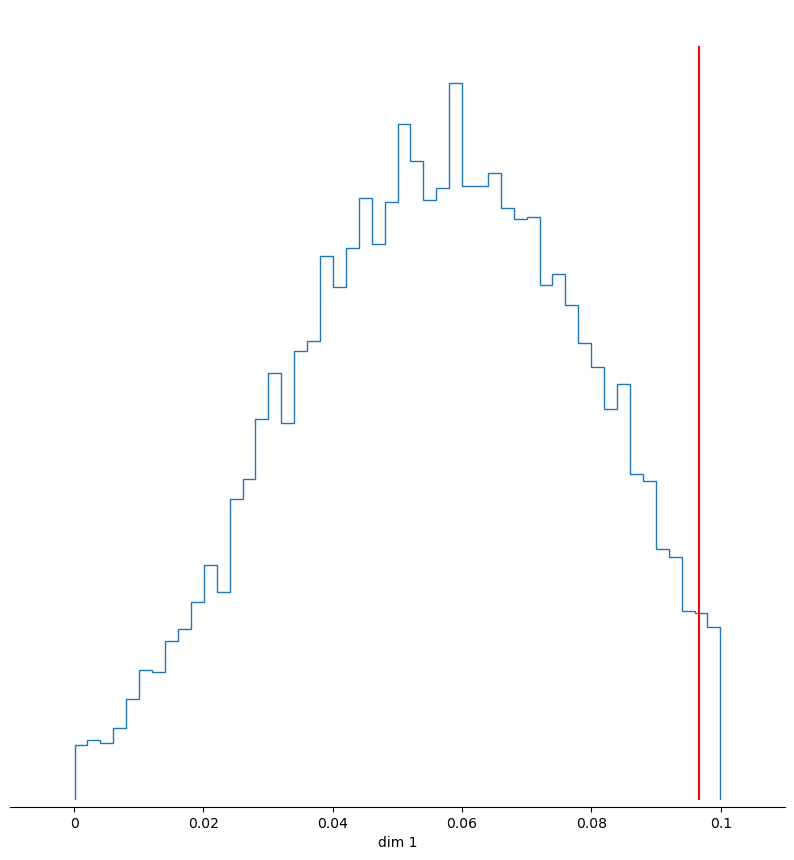

In [54]:
import random
from sbi.analysis import pairplot

z = random.randint(0, 499)
hgt_rate_test = hgt_rates_simulations[z]
x_test = gfs_simulations[z]

samples = posterior.sample((10000,), x=x_test)

print(hgt_rate_test)
pairplot(samples, points=[hgt_rate_test], points_colors=['r'] )